In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import bokeh as bk
from bokeh import io, charts

%matplotlib inline
io.output_notebook()

Loading BokehJS ...

### Preliminary Data Processing

The data I am using in this notebook comes from a very large Gender Statistics dataset released by the World Bank.

From their website:

"The Gender Statistics database is a comprehensive source for the latest sex-disaggregated data and gender statistics covering demography, education, health, access to economic opportunities, public life and decision-making, and agency."

The first thing we will do is some preliminary data manipulation, since the dataset is huge, and we definitely don't want to work with the entire set.

In [3]:
# Import data from .csv file
data_path = r'~/Desktop/DSNotebooks/gender_data.csv'
data = pd.read_csv(data_path)

# In this line, we restrict the data to individual countries,
# and also we will only look at the ten year period from 2004-2013
data2 = data.loc[31650:][list(data.ix[:,0:4]) + list(data.ix[:,'2004':'2013'])]

# Let's further restrict our data to the ten countries with the largest total labor force
top10 = data2[data2['Indicator Code'] == 'SL.TLF.TOTL.IN'].nlargest(10, '2004')['Country Code']
data2 = data2[data['Country Code'].isin(top10)]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [4]:
# Now, let's restrict the data even further to only look at the Labor Force Participation Rate for women and men, respectively.

lfpr_female = data2[data2['Indicator Code'] == 'SL.TLF.ACTI.FE.ZS']
lfpr_male = data2[data2['Indicator Code'] == 'SL.TLF.ACTI.MA.ZS']

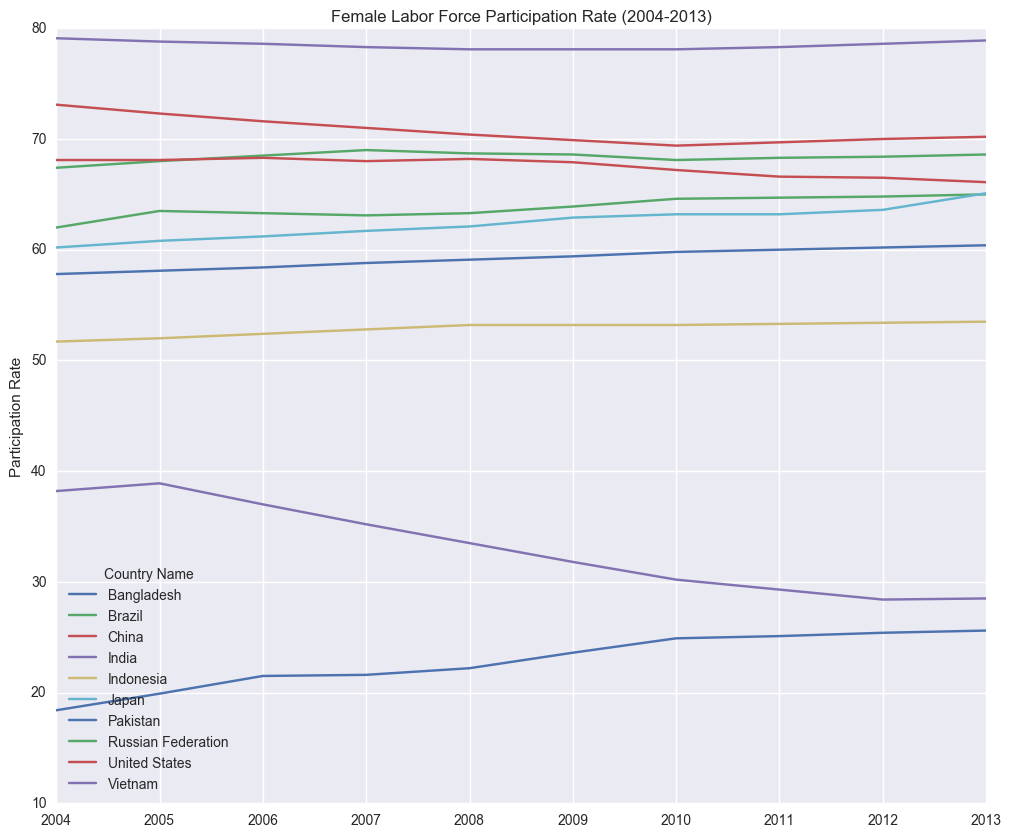

In [5]:
# OK great, now let's plot only the columns with numerical data.
# In order to directly plot this data using the .plot() wrapper provided by pandas,
# we have to set the index to the proper column, and transpose the data frame.

lfpr_female[list(lfpr_female.ix[:,0:1]) + list(lfpr_female.ix[:,'2004':'2013'])].set_index('Country Name').T.plot(title='Female Labor Force Participation Rate (2004-2013)', figsize=(12,10)).set_ylabel('Participation Rate')

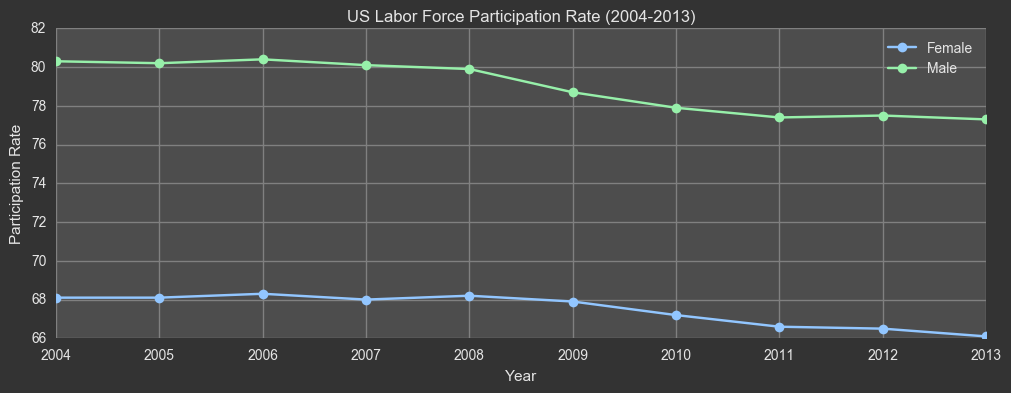

In [6]:
# Here, we will do some additional filtering, so we end up with just the participation rate
# for women and men in the United States. Then we can compare using a plot.

fem = lfpr_female[list(lfpr_female.ix[:,0:1]) + list(lfpr_female.ix[:,'2004':'2013'])].set_index('Country Name')
mal = lfpr_male[list(lfpr_male.ix[:,0:1]) + list(lfpr_male.ix[:,'2004':'2013'])].set_index('Country Name')

show = pd.concat([fem.loc['United States'], mal.loc['United States']], axis=1).reset_index()
show.columns = ["Year", "Female", "Male"]
cols = show['Year']
show = show.T.ix[1:3,]
show.columns = cols

# Here, we define the set of options to style our plot.
# Let's go for a darker style on this one.

options = {
    "axes.facecolor": ".3",
    'text.color': '.9',
    'figure.facecolor': '.2',
    'axes.labelcolor': '.9',
    'xtick.color': '.9',
    'ytick.color': '.9',
    'grid.color': '.5',
}

sb.set_style("darkgrid", options)
sb.set_palette("pastel")

show.T.plot(title='US Labor Force Participation Rate (2004-2013)', figsize=(12,4), marker='o').set_ylabel('Participation Rate')

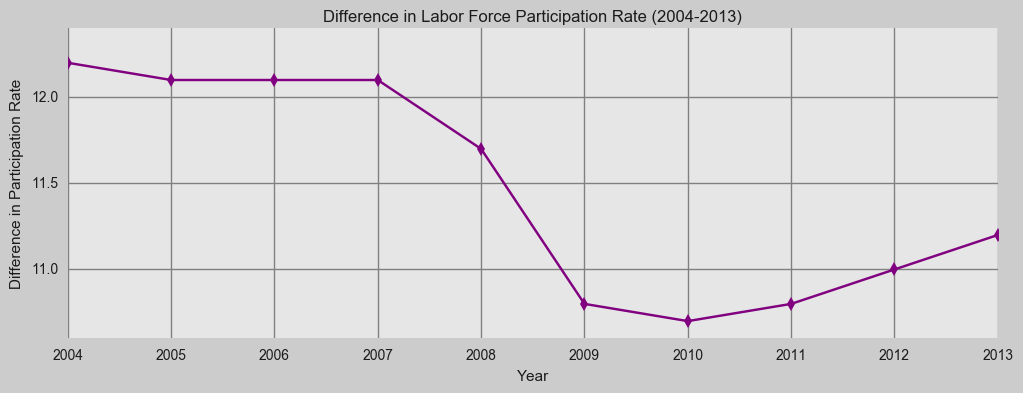

In [7]:
# Now let's look at how the difference between these rates has changed.

diff = show.T['Male'].sub(show.T['Female'])

# Again, we'll define some style parameters to help seaborn style the plot.

options = {
    "axes.facecolor": ".9",
    'text.color': '.1',
    'figure.facecolor': '.8',
    'axes.labelcolor': '.1',
    'xtick.color': '.1',
    'ytick.color': '.1',
    'grid.color': '.5',
}

sb.set_style("darkgrid", options)
sb.set_palette("dark")

diff.plot(title='Difference in Labor Force Participation Rate (2004-2013)', figsize=(12,4), marker='d', color='purple').set_ylabel('Difference in Participation Rate')

In [12]:
# In this line, once again we restrict the data to individual countries,
# and also we will only look at the ten year period from 2004-2013
data3 = data.loc[31650:][list(data.ix[:,0:4]) + list(data.ix[:,'1990':'2016'])]

In [13]:
lfpr_female2 = data3[data3['Indicator Code'] == 'SL.TLF.ACTI.FE.ZS']

In [14]:
new = lfpr_female2[['Country Code'] + list(lfpr_female2.loc[:,'1990':])].set_index('Country Code').T.reset_index()
new.columns = ['Year'] + list(new.columns[1:])
new.columns.name = ''

In [15]:
# Trying a bokeh plot now, with a VERY LARGE NUMBER of points.
# I wanted to see how the generated JavaScript object handles a large amount of data.

p = bk.charts.TimeSeries(new,
                         builder_type='point',
                         title='Female Labor Force Participation Rate',
                         xlabel='Year',
                         ylabel='Participation Rate',
                         plot_width=1000,
                         plot_height=700,
                        )
bk.charts.show(p)

In [16]:
new2 = new.set_index('Year')
new2.index.name= ''
new2.T
p2 = bk.charts.BoxPlot(new2.T)
bk.charts.show(p2)